<a href="https://colab.research.google.com/github/ThodupunooriSaiManish/Machine_Learning/blob/main/ML_Assignment_1(205).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
#a
# Step (1) Loading data into memory from drive
# Dataset: Heart Disease UCI (from Kaggle)

from google.colab import drive
import pandas as pd
import numpy as np

# Load the dataset

df=pd.read_csv('/content/drive/MyDrive/ML_Lab/Datasets/heart_disease_uci.csv')

# Displaying first 5 rows
print("First 5 rows of the dataset:")
display(df.head())

# Check basic info (column names, missing values, data types)
print("\nDataset Info:")
print(df.info())

print("\nSummary Statistics:")
display(df.describe())

First 5 rows of the dataset:


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB
None

Summary Statistics:


,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


In [19]:
#a
# Step (2) Making X matrix and y vector
# Droping irrelevant columns

df = df.drop(columns=['id', 'dataset', 'sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal' ])

# Converting target 'num' into binary form: 0 = no disease, 1 = disease for better data pre processing
df['target'] = df['num'].apply(lambda x: 1 if x > 0 else 0)

# Droping old 'num' column
df = df.drop(columns=['num'])

# Defining X and y
X = df.drop(columns=['target'])   # feature matrix
y = df['target']                  # target vector

print("Features (X) shape:", X.shape)
print("Target (y) shape:", y.shape)
print("\nFirst 5 rows of X:")
display(X.head())
print("\nFirst 5 values of y:")
print(y.head())

Features (X) shape: (920, 6)
Target (y) shape: (920,)

First 5 rows of X:


,age,trestbps,chol,thalch,oldpeak,ca
0,63,145.0,233.0,150.0,2.3,0.0
1,67,160.0,286.0,108.0,1.5,3.0
2,67,120.0,229.0,129.0,2.6,2.0
3,37,130.0,250.0,187.0,3.5,0.0
4,41,130.0,204.0,172.0,1.4,0.0



First 5 values of y:
0    0
1    1
2    1
3    0
4    0
Name: target, dtype: int64


In [20]:
#b
from sklearn.model_selection import train_test_split

#Splitting into train (80%) and test (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Dropping the rows with missing values
X_train = X_train.dropna()
y_train = y_train.loc[X_train.index]  # keeping  alignment

X_test = X_test.dropna()
y_test = y_test.loc[X_test.index]

print("Train set size:", X_train.shape[0])
print("Test set size:", X_test.shape[0])
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)


Train set size: 250
Test set size: 58
Shape of X_train: (250, 6)
Shape of X_test: (58, 6)


In [21]:
#c
from sklearn.linear_model import LogisticRegression

# Logistic Regression with L2 regularization
# C is the inverse of λ (regularization strength in scikit-learn)
# Smaller C → stronger regularization
log_reg = LogisticRegression(penalty="l2", C=1.0, solver="lbfgs", max_iter=1000)

# Fitting the  model on training data
log_reg.fit(X_train, y_train)

# Print objective components
print("Intercept (b):", log_reg.intercept_)
print("Weights (w):", log_reg.coef_)


Intercept (b): [4.02203716]
Weights (w): [[-2.52036080e-02  1.05982264e-02  5.31734227e-04 -3.74628698e-02
   5.39636130e-01  1.28899897e+00]]


In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, accuracy_score

#Defining the λ values to try
lambdas = [0, 0.1, 1, 10, 100, 1000]

#Converting to scikit-learn’s C (inverse of λ)
C_values = [np.inf if l == 0 else 1.0/l for l in lambdas]

#Providing storage for results
train_losses = []
test_losses = []
weight_norms = []
weight_values = []
train_accs = []
test_accs = []

#Training Logistic Regression for each λ
for C, lam in zip(C_values, lambdas):
    #Logistic regression with L2 regularization
    log_reg = LogisticRegression(
        penalty="l2",
        C=C,
        solver="lbfgs",
        max_iter=1000
    )

    #Training the model
    log_reg.fit(X_train, y_train)

    #Predictions (probabilities for cross-entropy)
    y_train_proba = log_reg.predict_proba(X_train)
    y_test_proba = log_reg.predict_proba(X_test)

    #Computing Cross-Entropy (Log Loss)
    train_losses.append(log_loss(y_train, y_train_proba))
    test_losses.append(log_loss(y_test, y_test_proba))

    #L2 Norm of weight vector
    weight_norms.append(np.linalg.norm(log_reg.coef_))

    #Store actual weight values (for plotting)
    weight_values.append(log_reg.coef_[0])

    #Accuracy
    train_accs.append(accuracy_score(y_train, log_reg.predict(X_train)))
    test_accs.append(accuracy_score(y_test, log_reg.predict(X_test)))

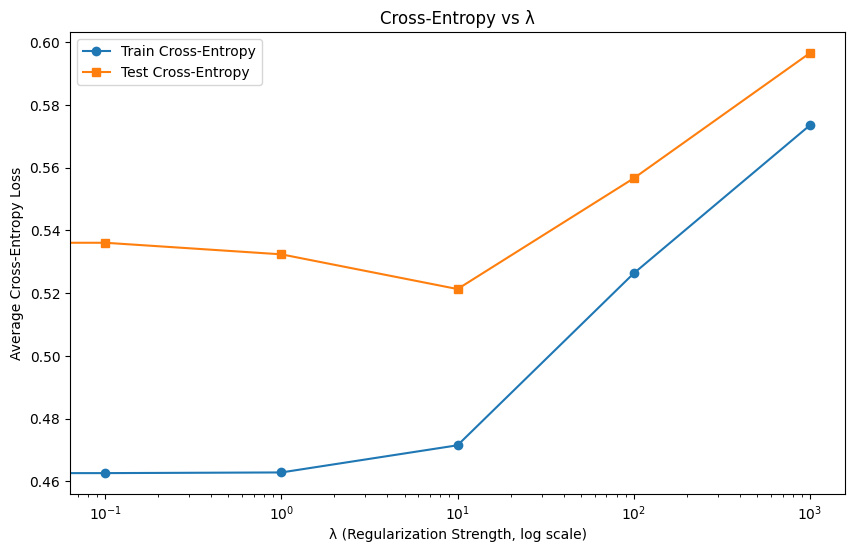

In [24]:
#Plot Results
#Plot 1: Cross-entropy vs λ

plt.figure(figsize=(10,6))
plt.plot(lambdas, train_losses, marker='o', label="Train Cross-Entropy")
plt.plot(lambdas, test_losses, marker='s', label="Test Cross-Entropy")
plt.xscale("log")
plt.xlabel("λ (Regularization Strength, log scale)")
plt.ylabel("Average Cross-Entropy Loss")
plt.title("Cross-Entropy vs λ")
plt.legend()
plt.show()

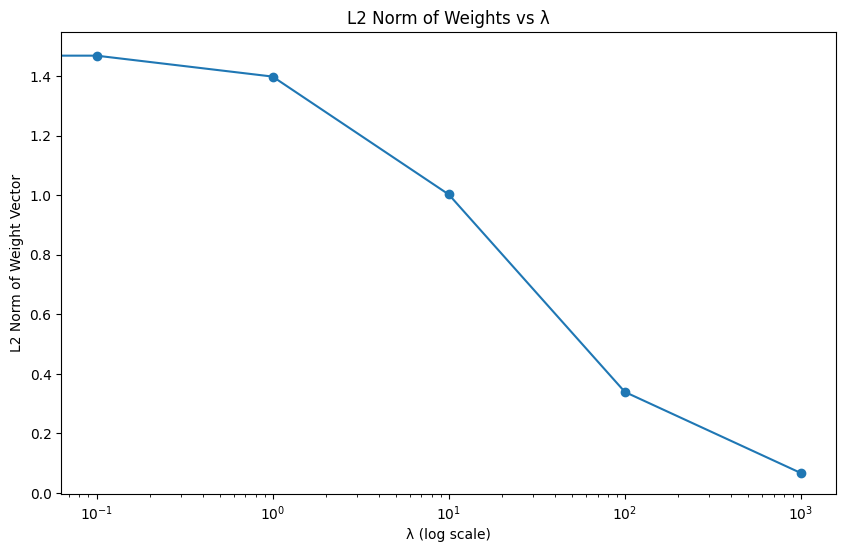

In [25]:
# Plot 2: Weight norm vs λ
plt.figure(figsize=(10,6))
plt.plot(lambdas, weight_norms, marker='o')
plt.xscale("log")
plt.xlabel("λ (log scale)")
plt.ylabel("L2 Norm of Weight Vector")
plt.title("L2 Norm of Weights vs λ")
plt.show()

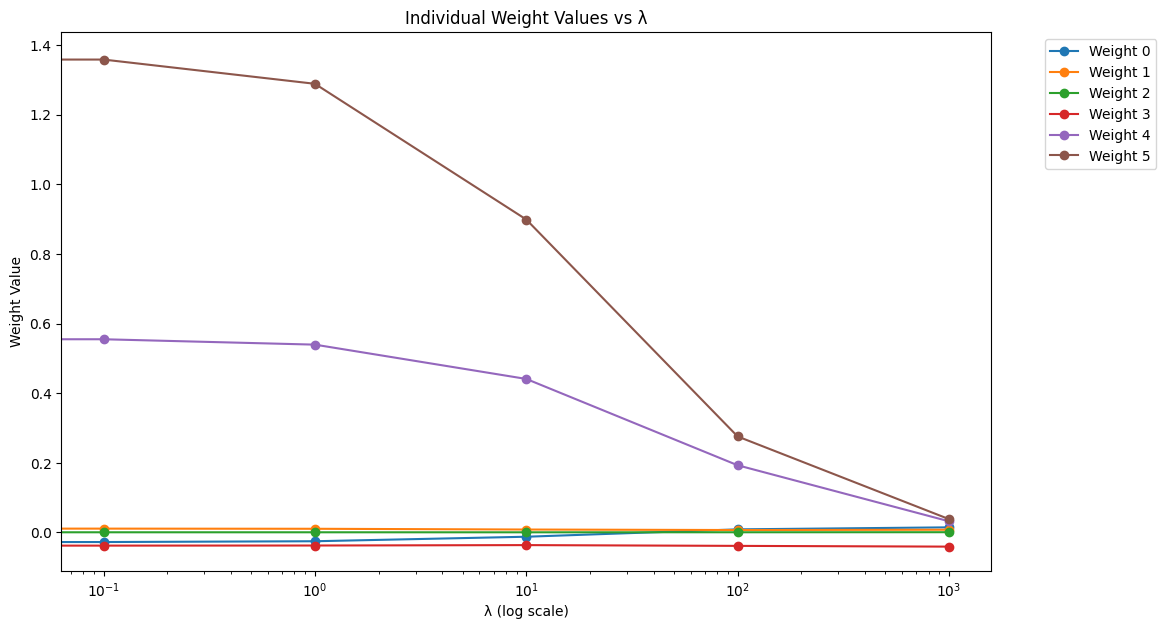

In [26]:
# Plot 3: Actual weights vs λ
plt.figure(figsize=(12,7))
weight_values = np.array(weight_values)  # shape = (len(lambdas), num_features)
for j in range(weight_values.shape[1]):
    plt.plot(lambdas, weight_values[:, j], marker='o', label=f"Weight {j}")
plt.xscale("log")
plt.xlabel("λ (log scale)")
plt.ylabel("Weight Value")
plt.title("Individual Weight Values vs λ")
plt.legend(bbox_to_anchor=(1.05,1), loc="upper left")
plt.show()

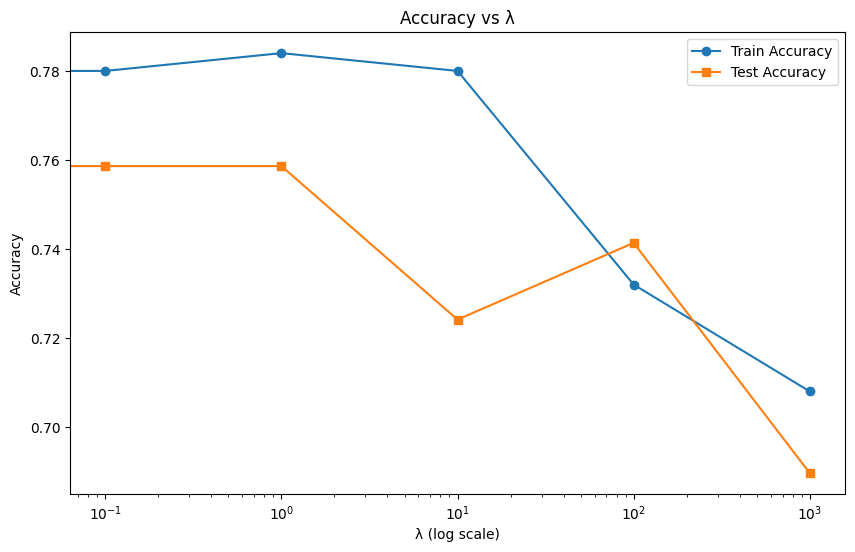

In [27]:
# Plot 4: Accuracy vs λ
plt.figure(figsize=(10,6))
plt.plot(lambdas, train_accs, marker='o', label="Train Accuracy")
plt.plot(lambdas, test_accs, marker='s', label="Test Accuracy")
plt.xscale("log")
plt.xlabel("λ (log scale)")
plt.ylabel("Accuracy")
plt.title("Accuracy vs λ")
plt.legend()
plt.show()